In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.tree as st
import sklearn.metrics as sm

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bm = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
X = bm.data.features 
y = bm.data.targets 
  
# metadata 
#print(bank_marketing.metadata) 
  
# variable information 
print(bm.variables) 


           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [6]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [7]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [9]:
# Find missing values
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','month', 'contact', 'poutcome']
print(categorical_cols)

# Apply label encoding to the categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X.loc[:,col] = le.fit_transform(X[col])

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact', 'poutcome']


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create the decision tree classifier
clf = st.DecisionTreeClassifier(max_depth=5, random_state=42)


In [13]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
# Evaluate the performance of the classifier on the testing set
y_pred = clf.predict(X_test)

print("Accuracy:", sm.accuracy_score(y_test, y_pred))
print("\nClassification report:\n", sm.classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", sm.confusion_matrix(y_test, y_pred))


Accuracy: 0.8935087913303107

Classification report:
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      7952
         yes       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043


Confusion matrix:
 [[7644  308]
 [ 655  436]]


In [17]:
from sklearn.tree import export_graphviz
import graphviz 
from graphviz import Source

dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=['no', 'yes'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")

'decision_tree.png'

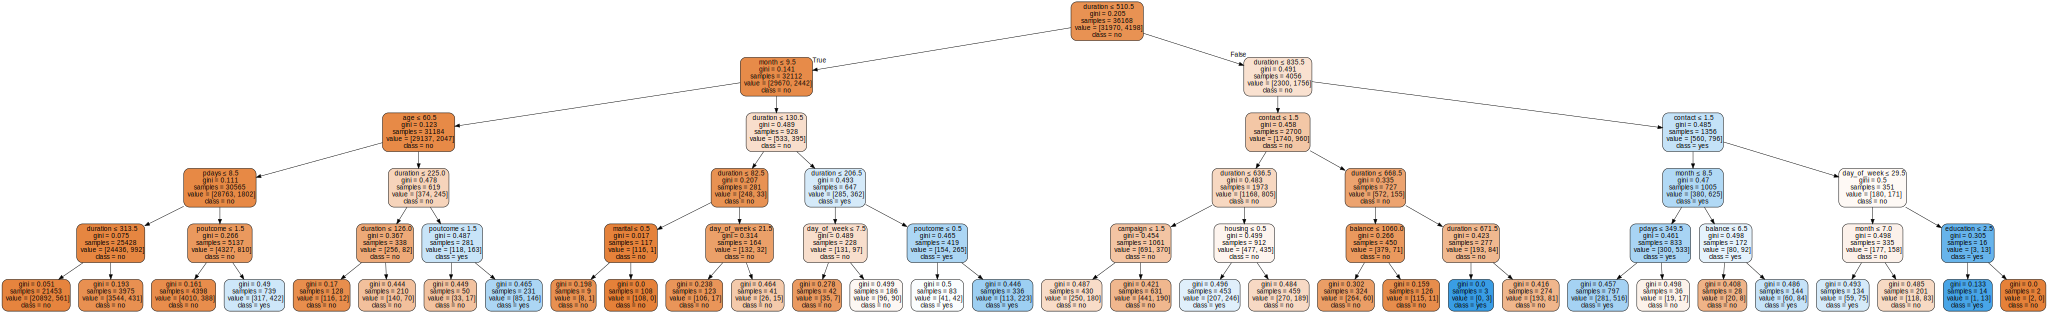

In [18]:
graph